# Model 3: XGBoost / Gradient Boosting

**Goal:** Implement XGBoost to improve predictive performance over Decision Tree and Random Forest baselines.

**Key Steps:**
1. Load Data
2. Preprocessing (Encoding)
3. Train XGBoost Classifier
4. Evaluate Performance (Accuracy, ROC-AUC, F1-Score)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [2]:
# Load dataset
df = pd.read_csv('./data/credit_risk_dataset.csv')

# Drop raw text column
df_clean = df.drop(columns=['customer_financial_statement'])

In [3]:
# Encode categorical variables
categorical_cols = [
    'employment_type', 'education_level', 'marital_status', 
    'region', 'sentiment', 'financial_stress_level', 'risk_category'
]

le = LabelEncoder()
for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

# Define X and y
X = df_clean.drop('default_risk', axis=1)
y = df_clean['default_risk']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize and Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

print("XGBoost Model Trained Successfully!")

XGBoost Model Trained Successfully!


c:\Users\Iman Haikal\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:38:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.96
ROC-AUC Score: 0.9945242326720783

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       191
           1       0.96      0.93      0.94       109

    accuracy                           0.96       300
   macro avg       0.96      0.95      0.96       300
weighted avg       0.96      0.96      0.96       300



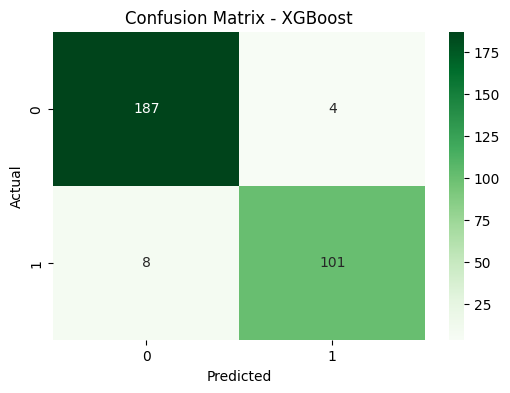

In [5]:
# Predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()